In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#essential libaries

In [2]:
#reading data and a quick look!

df = pd.read_csv("D:\Desktop\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape
# 8 columns and 1000 rows 

(1000, 8)

In [4]:
df.info()
# columns and their types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.isna().sum()
#none N/A answers

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.describe()
#Average scores, minimum scores, max scores, etc.

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


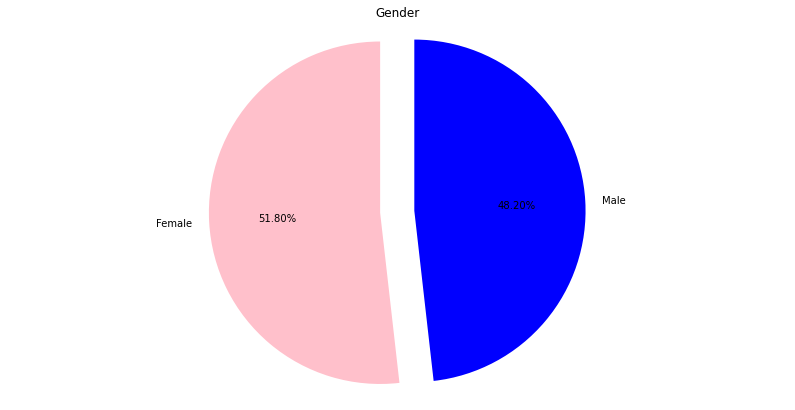

In [7]:
plt.figure(figsize=(14, 7))
labels=['Female', 'Male']
plt.pie(df['gender'].value_counts(),labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',colors=['PINK','BLUE'], startangle=90)
plt.title('Gender')
plt.axis('equal')
plt.show()


rougly there are more girls than boys by 2 percent

In [8]:
#lets get the total marks 
df["Percentage"] = (df['math score']+df['reading score']+df['writing score'])/3

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [10]:

def Grade(Percentage):
    if (Percentage >= 95):return 'A+'
    if (Percentage >= 81):return 'A'
    if (Percentage >= 71):return 'B'
    if (Percentage >= 61):return 'C'
    if (Percentage >= 51):return 'D'
    if (Percentage >= 41):return 'E'
    else: return 'F'
    
df["grade"] = df.apply(lambda x : Grade(x["Percentage"]), axis=1)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B


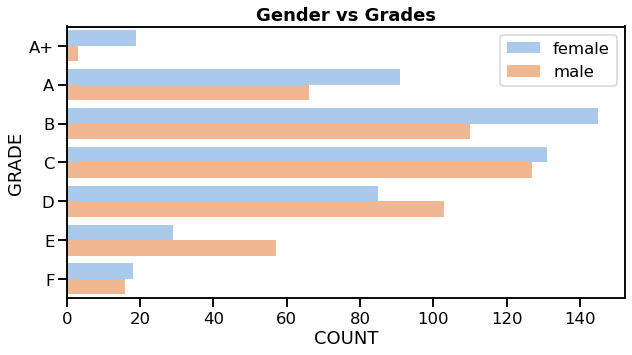

In [12]:
plt.figure(figsize=(10,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="gender", data=df, order=["A+","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()
#in this data, female usually is more than boys in the higher grades

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


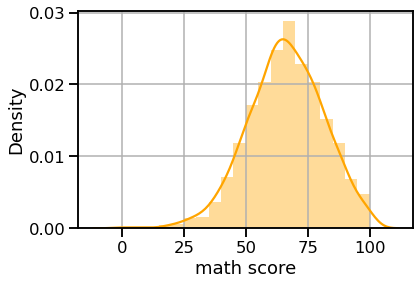

In [61]:
sns.distplot(df['math score'], bins=20, color='orange')
plt.grid()
#Math scores average lies on 60 - 70 percent

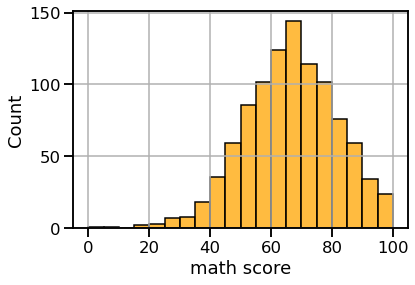

In [62]:
sns.histplot(df['math score'], bins=20, color='orange')
plt.grid()
#Math scores average lies on 60 - 70 percent

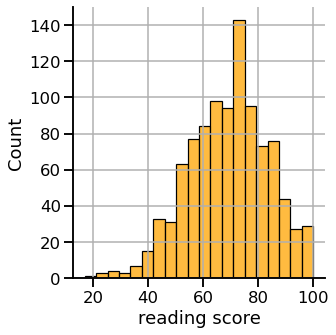

In [14]:
sns.displot(df['reading score'], bins=20, color='orange')
plt.grid()
#lies on 65-75 percent

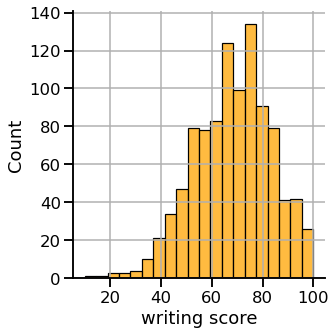

In [15]:
sns.displot(df['writing score'], bins=20, color='orange')
plt.grid()
#lies between 65 - 75

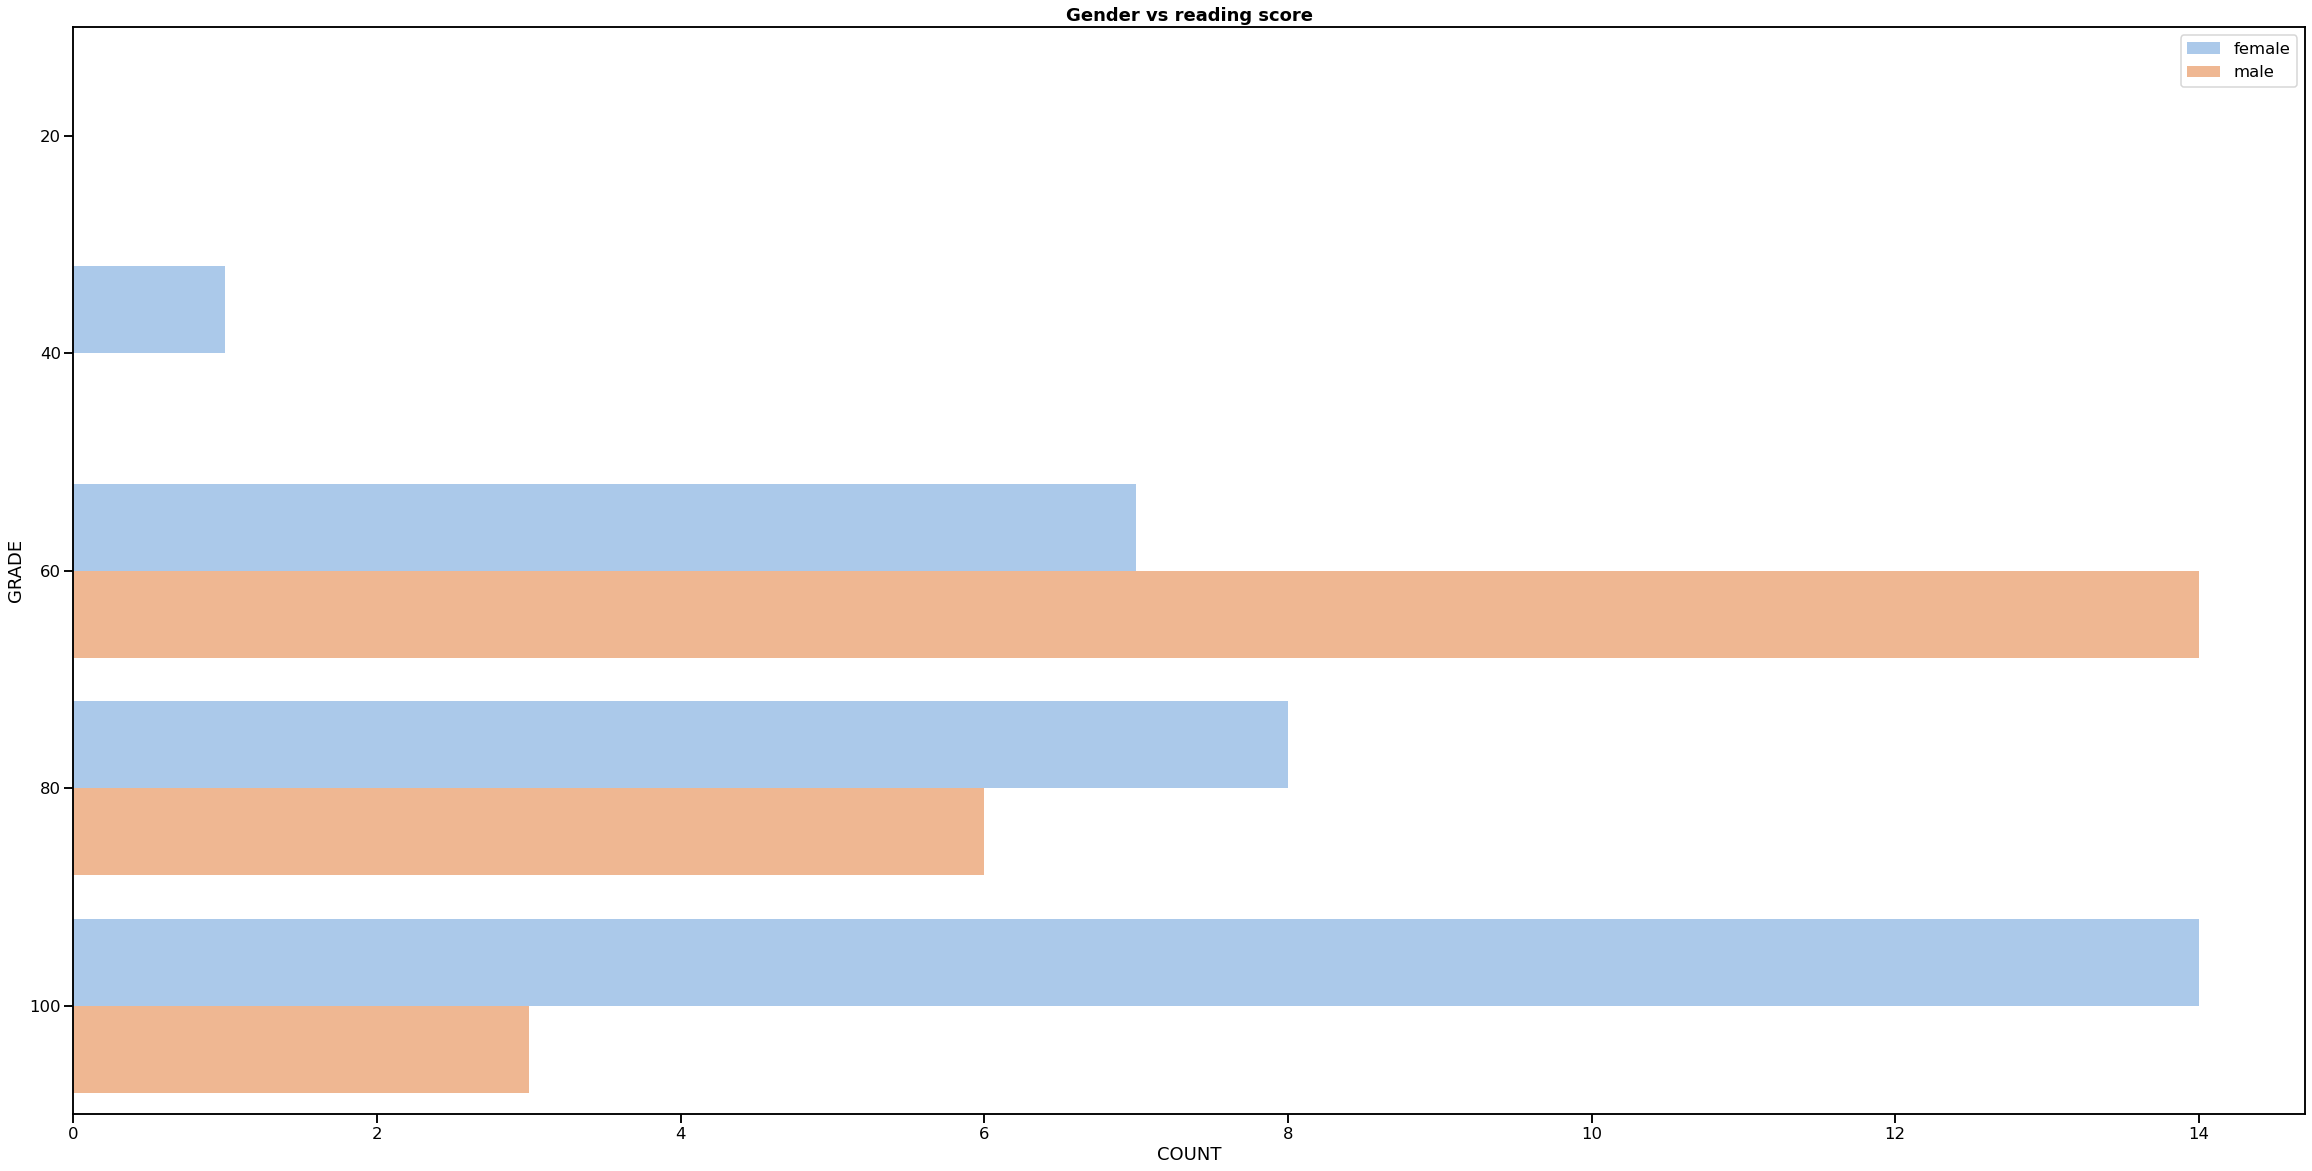

In [64]:
plt.figure(figsize=(40,20))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="reading score", hue="gender", data=df, order=[20,40,60,80,100])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs reading score', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()
#in this graph shows that females is more than males in the higher scores

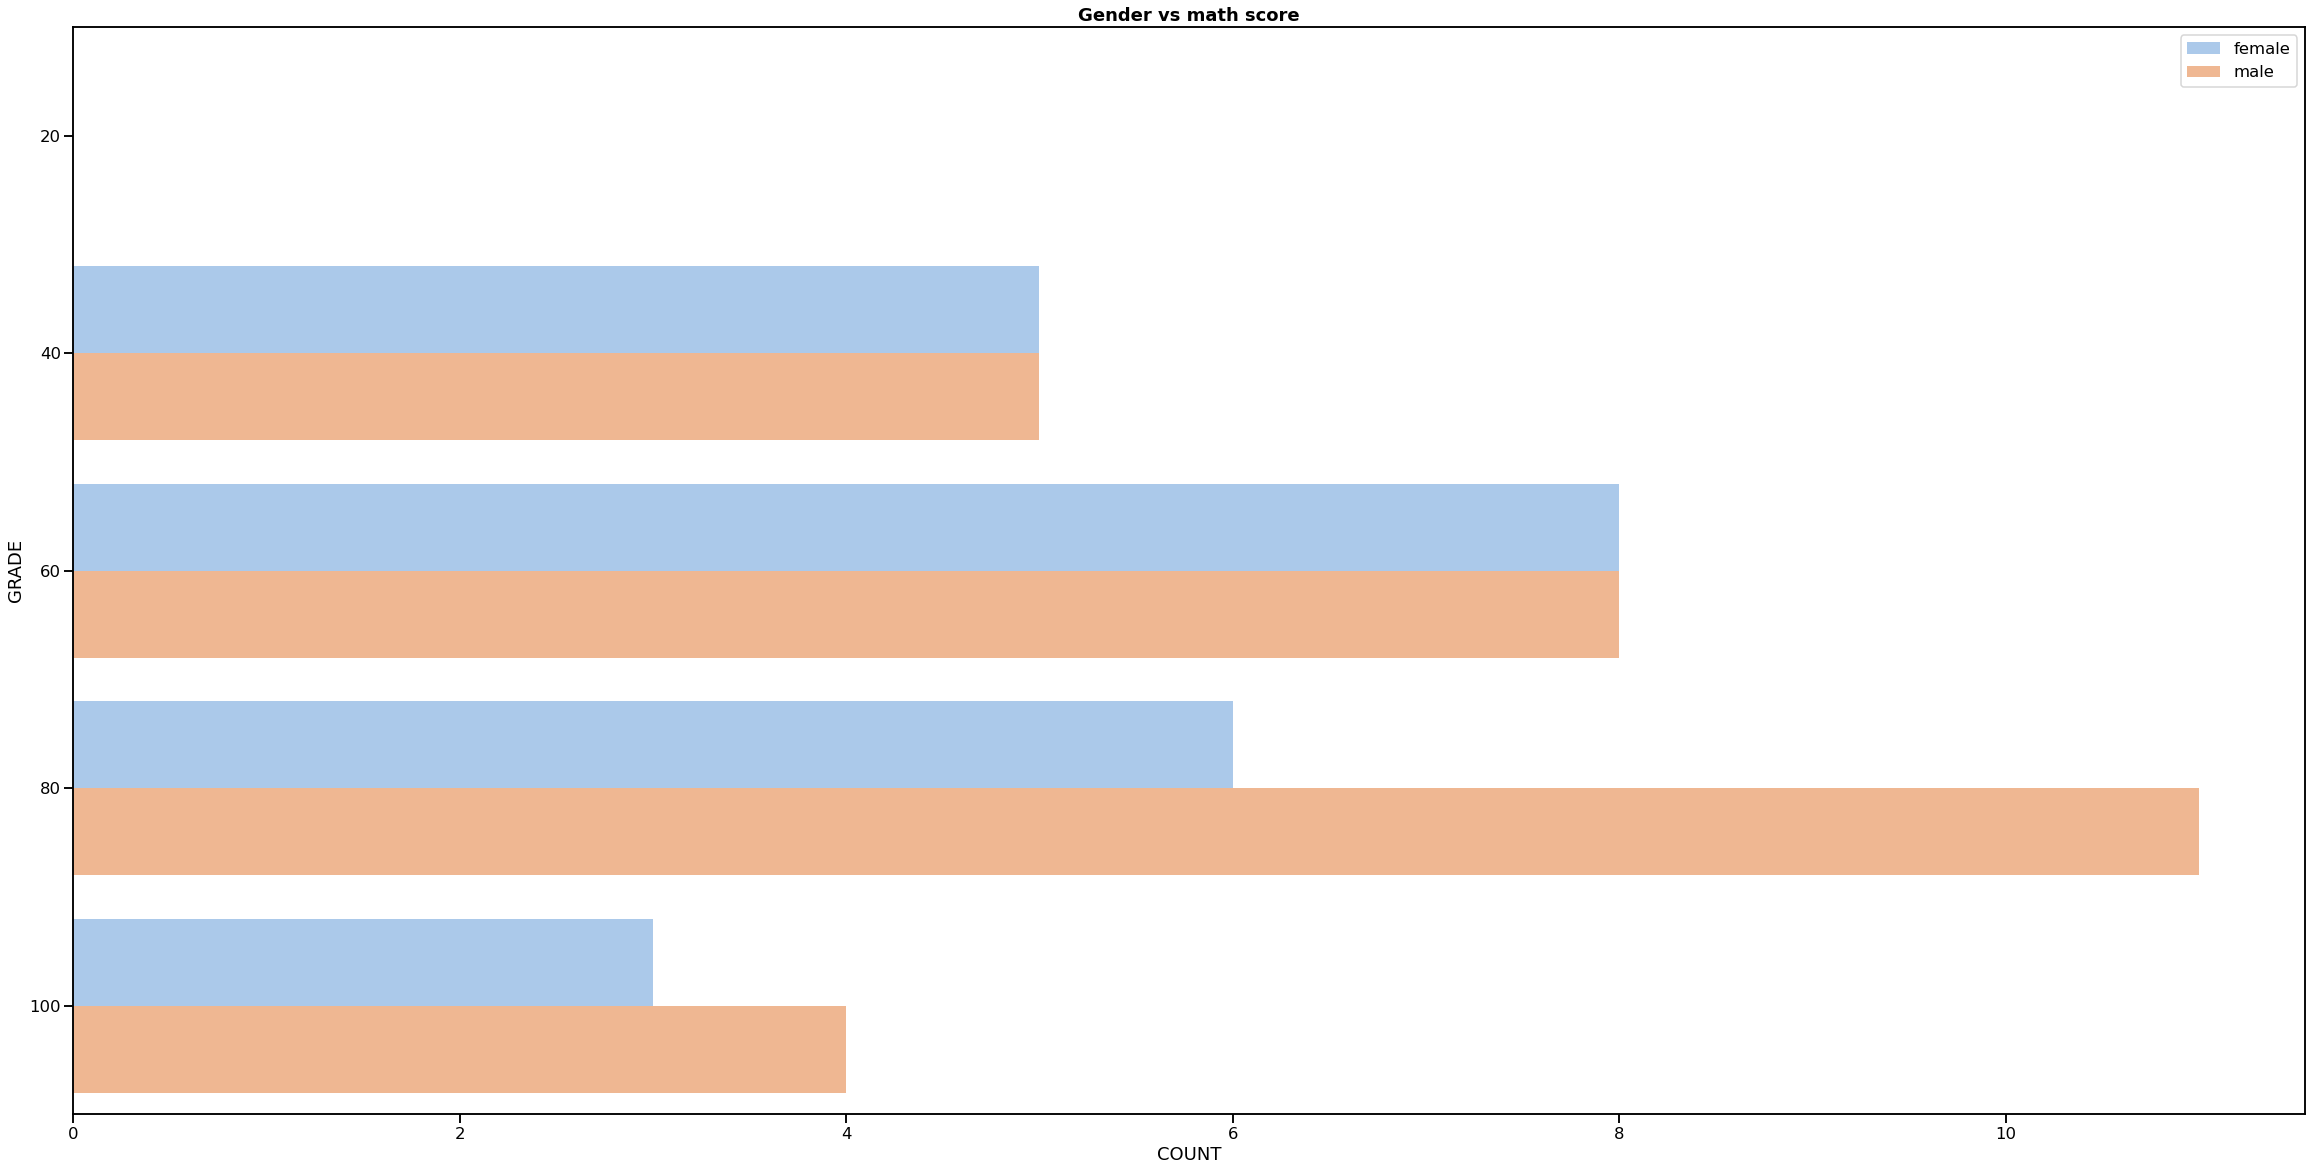

In [65]:
plt.figure(figsize=(40,20))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="math score", hue="gender", data=df, order=[20,40,60,80,100])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs math score', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()
#in this graph shows that males is more than males in the higher scores, but in the mid range scores females is much more

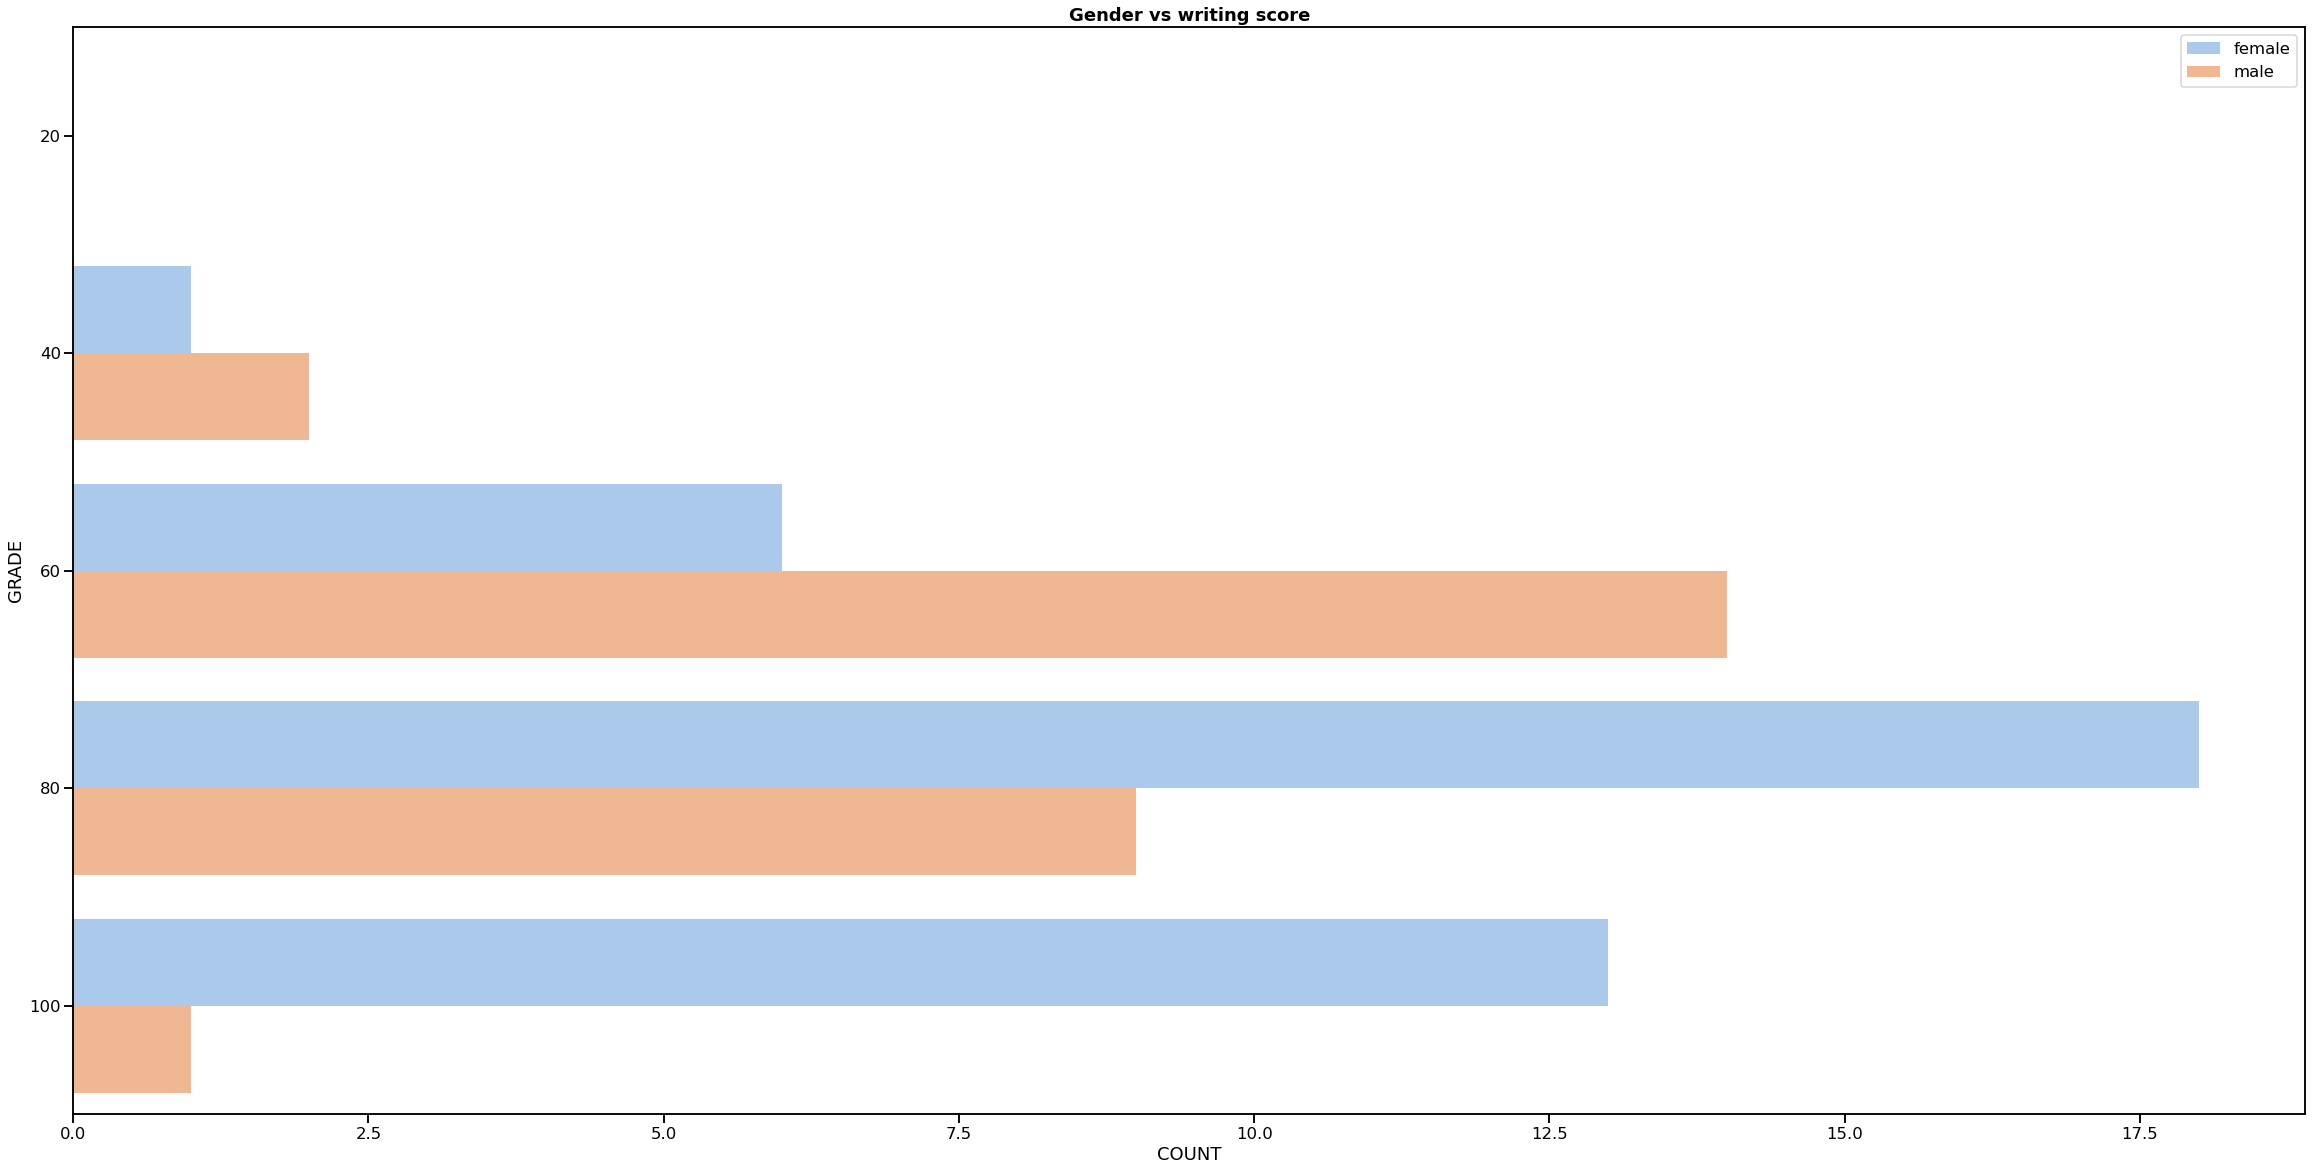

In [66]:
plt.figure(figsize=(40,20))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="writing score", hue="gender", data=df, order=[20,40,60,80,100])
ax.legend(loc='upper right',frameon=True)
plt.title('Gender vs writing score', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()
#in this graph shows that females is more than males in the higher scores

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,E
4,male,group C,some college,standard,none,76,78,75,76.333333,B
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,A
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,D
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,C
998,female,group D,some college,standard,completed,68,78,77,74.333333,B


In [22]:
df["lunch"].unique()
#two types of lunches only

array(['standard', 'free/reduced'], dtype=object)

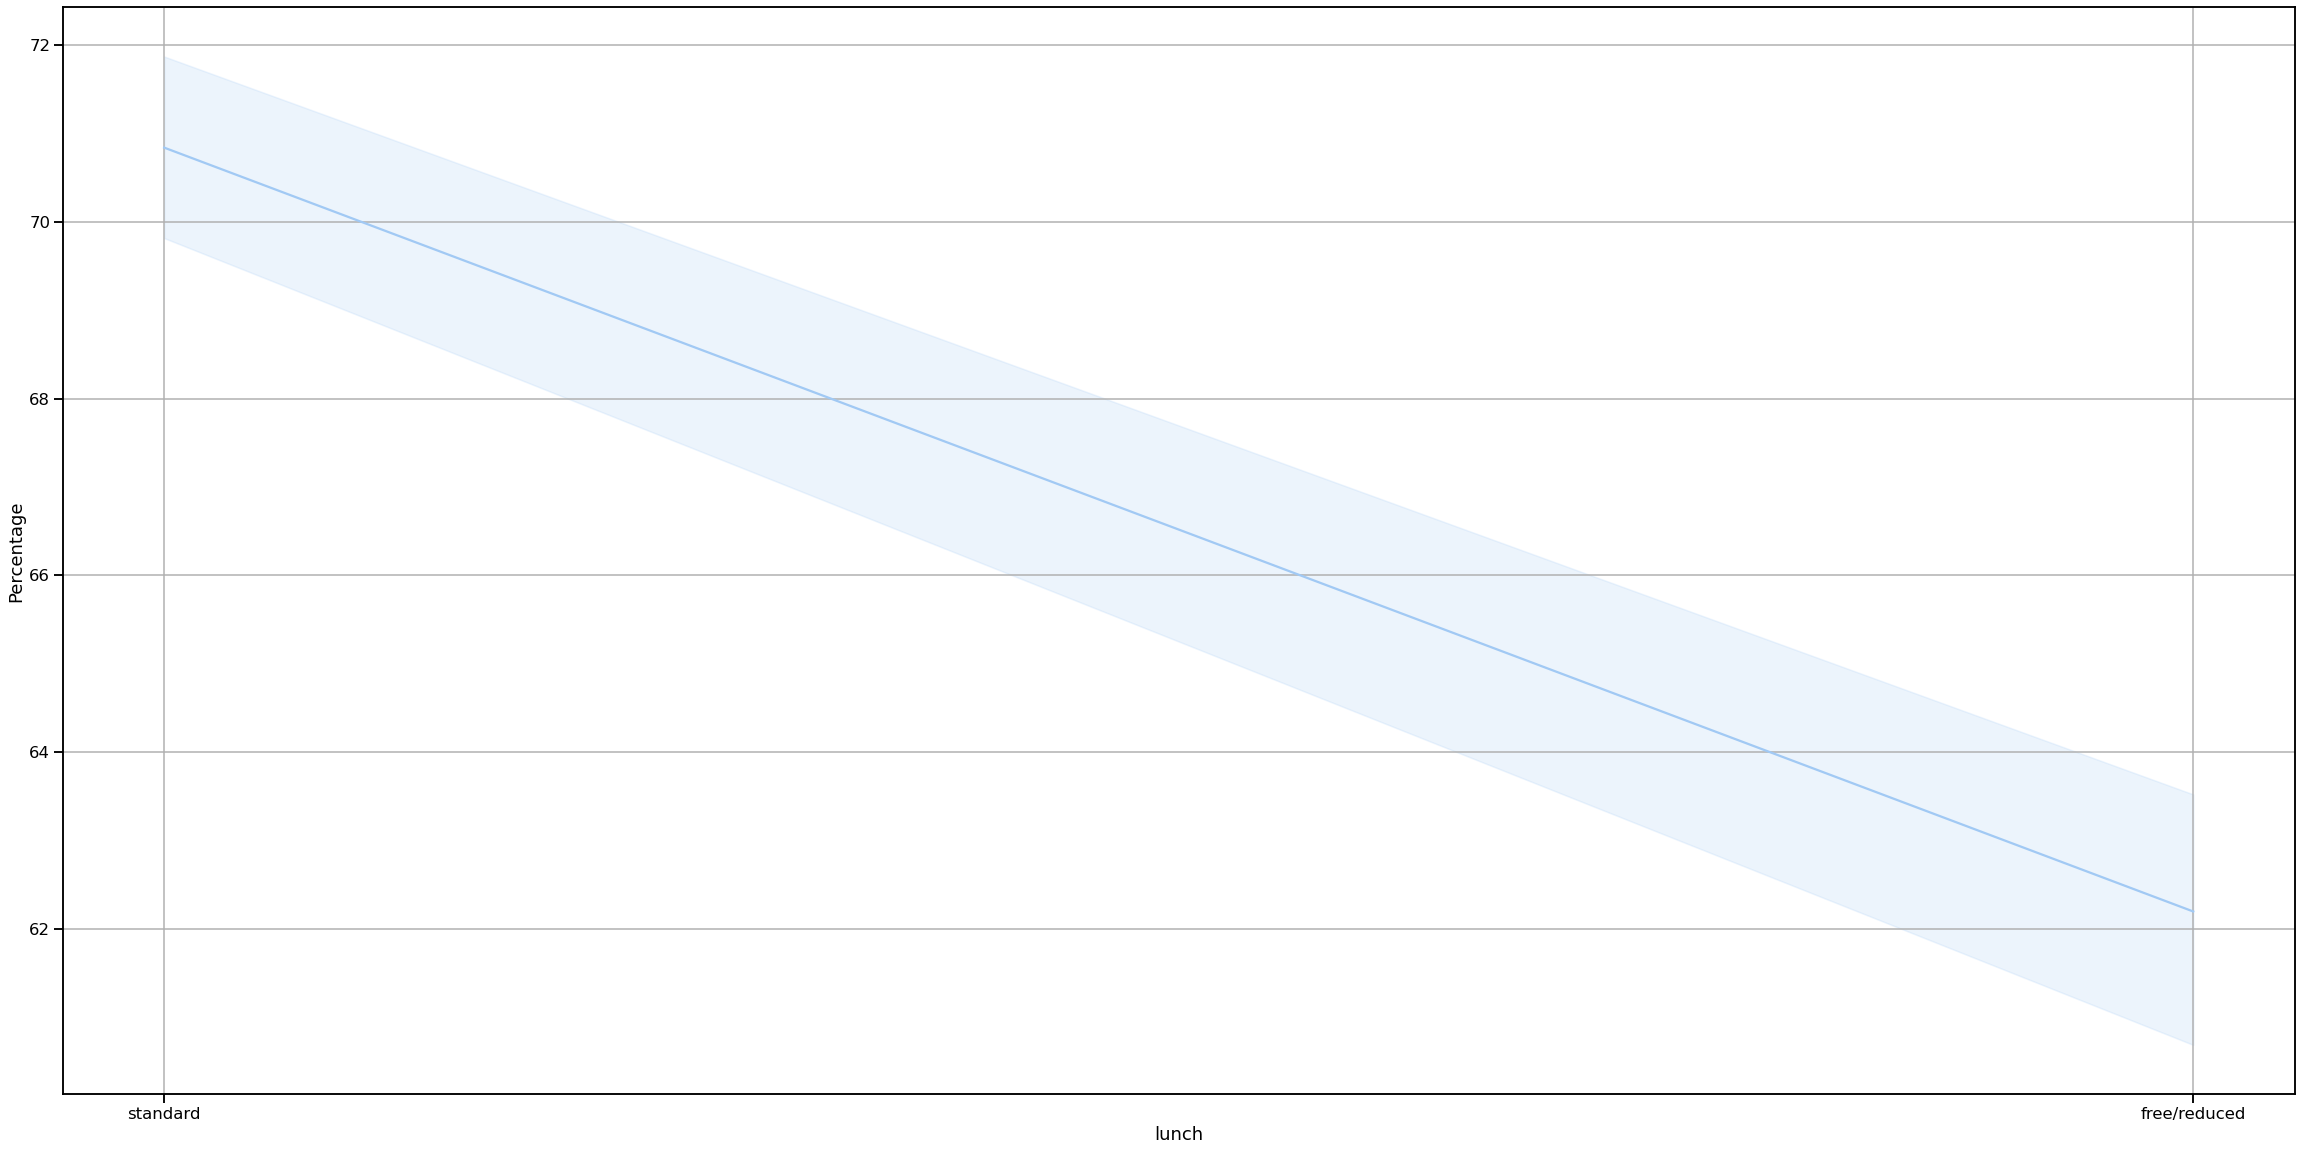

In [40]:
plt.figure(figsize=(40,20))
sns.lineplot(data=df, x="lunch", y="Percentage")
plt.grid()
# the more completed meal you consume, more likely you score higher

In [41]:
df["test preparation course"].uniqueue()
#2 unique values in preparation

array(['none', 'completed'], dtype=object)

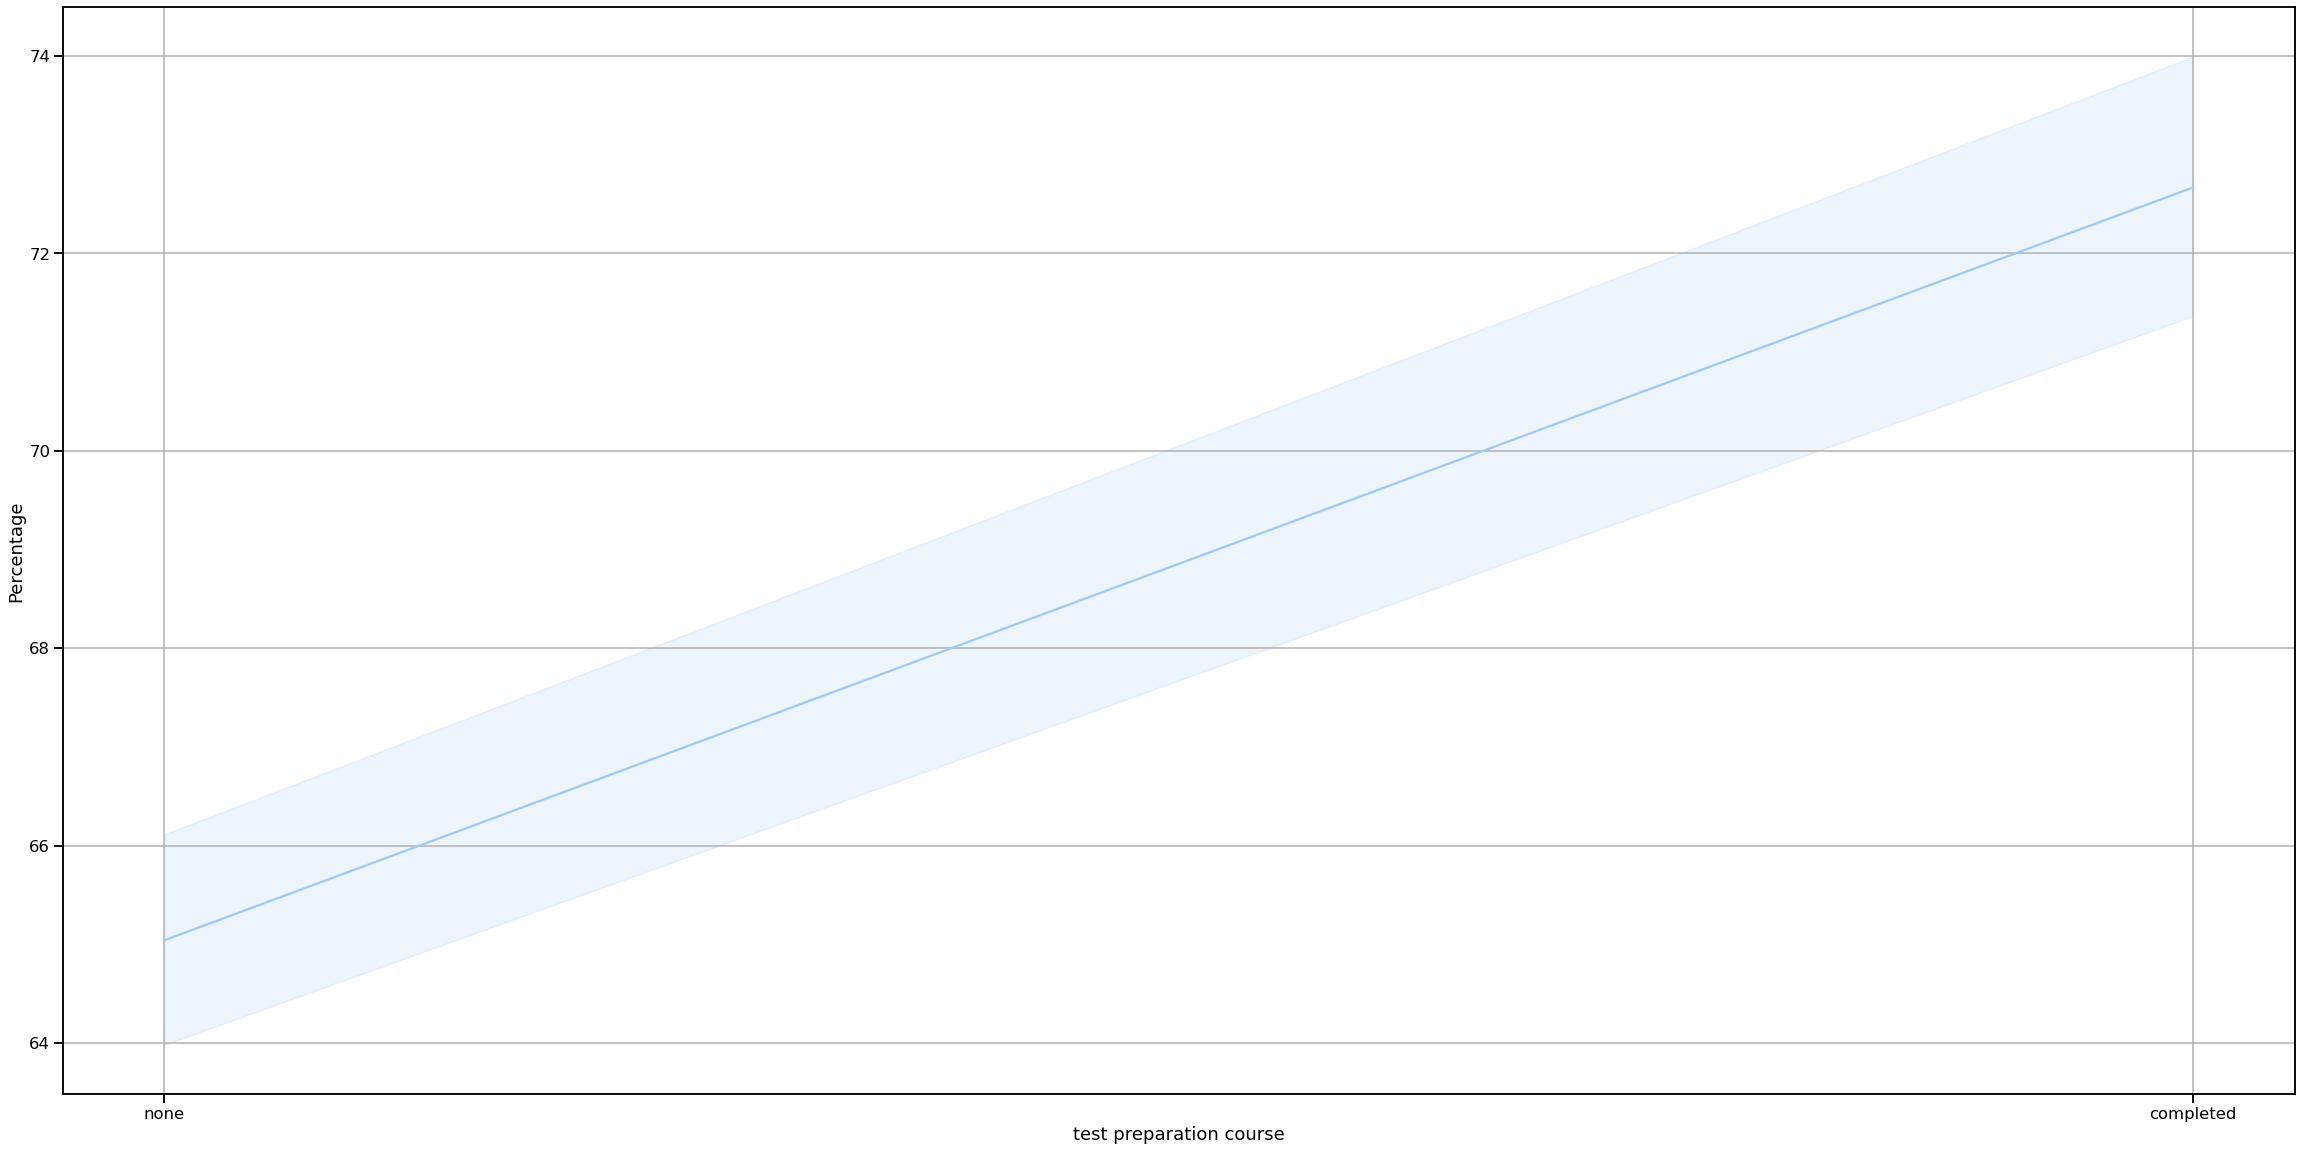

In [42]:
plt.figure(figsize=(40,20))
sns.lineplot(data=df, x="test preparation course", y="Percentage")
plt.grid()
#the more prepared you are, more likely to score higher

In [48]:
df["race/ethnicity"].unique()
df["race/ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

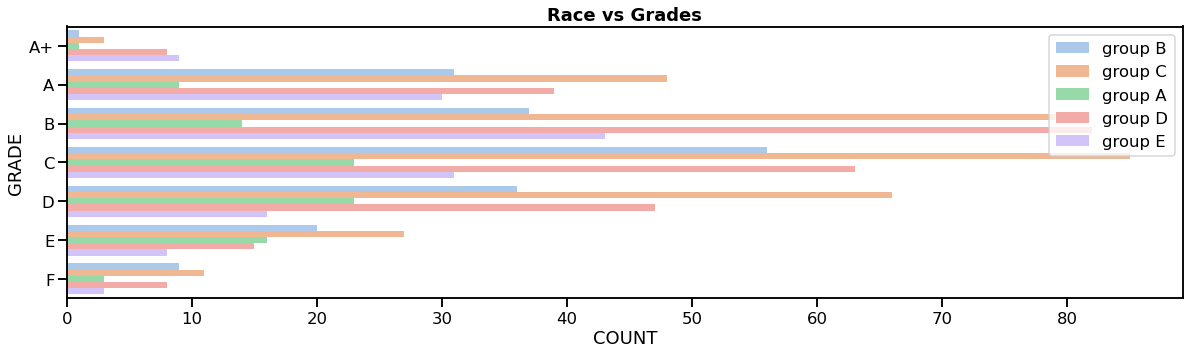

In [49]:
plt.figure(figsize=(20,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue="race/ethnicity", data=df, order=["A+","A","B","C","D","E","F"])
ax.legend(loc='upper right',frameon=True)
plt.title('Race vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()
#Group E and D occupies the higher grades, in the midrange grades, Group C and D occupies, in the lower range grades, Group B and Group c occupies
#Keep in mind Group C is about 30 percent of data participants, which adds to bias error.

In [57]:
df['parental level of education'].value_counts()
#Parents' educantional level on every participants

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

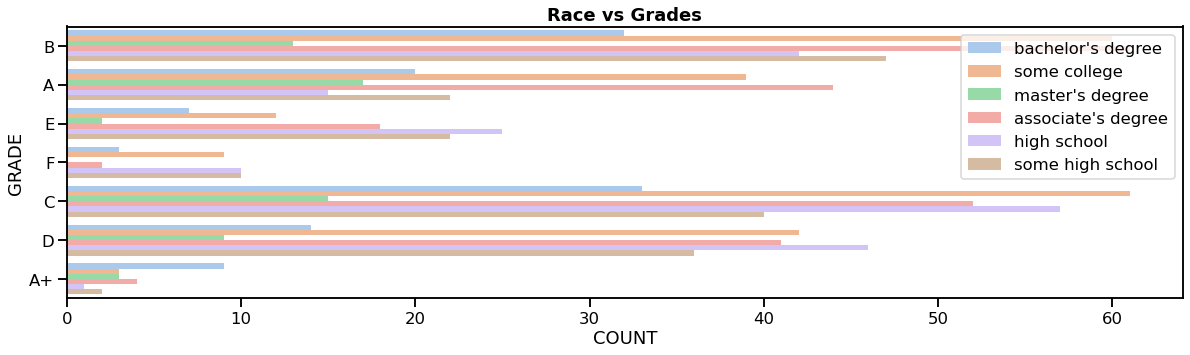

In [59]:
plt.figure(figsize=(20,5))
sns.set_context("talk",font_scale=1)
sns.set_palette("pastel")
ax = sns.countplot(y="grade", hue='parental level of education', data=df)
ax.legend(loc='upper right',frameon=True)
plt.title('Race vs Grades', fontsize=18, fontweight='bold')
ax.set(xlabel='COUNT',ylabel='GRADE')
plt.show()
#the graps says your parent's educational level more likely doesent effect your scores